In [1]:
import torch
from torch import nn
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
x_org, y_org = iris.data, iris.target

print('원본 데이터', x_org.shape, y_org.shape)

원본 데이터 (150, 4) (150,)


In [3]:
x_select = x_org[:, [0,2]]

print('원본 데이터', x_select.shape, y_org.shape)

원본 데이터 (150, 2) (150,)


In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_select, y_org, train_size=75, test_size=75, random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(75, 2) (75, 2) (75,) (75,)


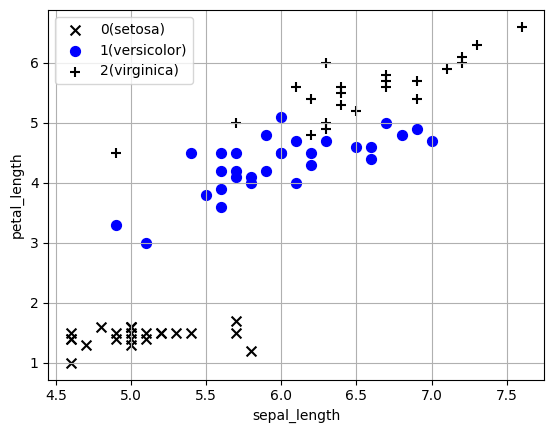

In [5]:
x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
x_t2 = x_train[y_train == 2]

plt.scatter(x_t0[:, 0], x_t0[:, 1], marker='x', c='k', s=50, label='0(setosa)')
plt.scatter(x_t1[:, 0], x_t1[:, 1], marker='o', c='b', s=50, label='1(versicolor)')
plt.scatter(x_t2[:, 0], x_t2[:, 1], marker='+', c='k', s=50, label='2(virginica)')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()
plt.grid()
plt.show()

In [6]:
n_input = x_train.shape[1]
n_output = len(list(set(y_train)))

print(f'n_input: {n_input} n_output: {n_output}')

n_input: 2 n_output: 3


In [8]:
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)

        self.l1.weight.data.fill_(1.0)
        self.l1.bias.data.fill_(1.0)

    def forward(self, x):
        x1 = self.l1(x)
        return x1
    
net = Net(n_input, n_output)

In [10]:
for parameter in net.named_parameters():
    print(parameter)
    print()

('l1.weight', Parameter containing:
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True))

('l1.bias', Parameter containing:
tensor([1., 1., 1.], requires_grad=True))



In [11]:
criterion = nn.CrossEntropyLoss()
lr = 0.01
optimizer = optim.SGD(net.parameters(), lr=lr)

In [12]:
inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).long()

inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).long()

In [13]:
outputs = net(inputs)
loss = criterion(outputs, labels)

In [14]:
print(torch.max(outputs, 1))

torch.return_types.max(
values=tensor([12.0000, 12.7000,  7.6000, 13.0000, 12.3000,  7.6000,  7.3000, 11.1000,
        12.1000, 13.3000,  8.0000,  7.0000, 10.3000,  7.6000, 11.7000, 13.3000,
         7.4000, 13.5000,  8.2000,  8.4000, 12.7000,  6.6000,  7.9000, 12.2000,
        14.6000, 12.0000, 10.2000, 10.5000,  7.1000,  7.3000, 12.6000, 12.7000,
         7.4000,  7.7000, 10.8000, 11.5000, 11.5000, 14.0000, 12.8000, 10.8000,
        10.8000, 15.2000,  7.5000,  7.8000, 11.1000, 13.6000, 12.9000, 14.2000,
        12.7000,  7.6000, 10.9000,  7.0000, 10.9000, 11.2000,  7.4000, 11.7000,
        13.3000, 11.5000, 13.4000, 12.7000,  7.7000, 11.8000,  7.0000, 12.6000,
        11.7000, 10.9000,  9.2000, 12.2000, 10.4000, 12.1000,  7.5000,  9.1000,
        11.1000, 12.0000, 14.3000], grad_fn=<MaxBackward0>),
indices=tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 

In [15]:
print(torch.max(outputs, 1)[1])

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])


In [16]:
lr = 0.01
net = Net(n_input, n_output)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
num_epochs = 10000
history = np.zeros((0, 5))

In [17]:
print(f"📌 모델이 위치한 장치: {next(net.parameters()).device}")
print(f"📥 inputs의 장치: {inputs.device}")
print(f"📤 outputs의 장치: {outputs.device}")

📌 모델이 위치한 장치: cpu
📥 inputs의 장치: cpu
📤 outputs의 장치: cpu


In [18]:
for epoch in range(num_epochs):
    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    predicted = torch.max(outputs, 1)[1]
    train_loss = loss.item()
    train_acc = (predicted == labels).sum() / len(labels)

    outputs_test = net(inputs_test)
    loss_test = criterion(outputs_test, labels_test)

    predicted_test = torch.max(outputs_test, 1)[1]
    val_loss = loss_test.item()
    val_acc = (predicted_test == labels_test).sum() / len(labels_test)

    if (epoch % 10 == 0):
        print(f'Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f} val_acc: {val_acc:.5f}')
        item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))

Epoch [0/10000], loss: 1.09861 acc: 0.30667 val_loss: 1.09263 val_acc: 0.26667
Epoch [10/10000], loss: 1.03580 acc: 0.40000 val_loss: 1.06403 val_acc: 0.26667
Epoch [20/10000], loss: 1.00477 acc: 0.40000 val_loss: 1.03347 val_acc: 0.26667
Epoch [30/10000], loss: 0.97672 acc: 0.40000 val_loss: 1.00264 val_acc: 0.26667
Epoch [40/10000], loss: 0.95057 acc: 0.41333 val_loss: 0.97351 val_acc: 0.26667
Epoch [50/10000], loss: 0.92616 acc: 0.48000 val_loss: 0.94631 val_acc: 0.38667
Epoch [60/10000], loss: 0.90338 acc: 0.69333 val_loss: 0.92098 val_acc: 0.56000
Epoch [70/10000], loss: 0.88212 acc: 0.70667 val_loss: 0.89740 val_acc: 0.60000
Epoch [80/10000], loss: 0.86227 acc: 0.70667 val_loss: 0.87545 val_acc: 0.61333
Epoch [90/10000], loss: 0.84373 acc: 0.70667 val_loss: 0.85500 val_acc: 0.62667
Epoch [100/10000], loss: 0.82640 acc: 0.70667 val_loss: 0.83594 val_acc: 0.62667
Epoch [110/10000], loss: 0.81019 acc: 0.72000 val_loss: 0.81815 val_acc: 0.62667
Epoch [120/10000], loss: 0.79500 acc: 0

In [19]:
print(f"초기상태: 손실: {history[0, 3]:.5f} 정확도: {history[0, 4]:.5f}")
print(f"최종상태: 손실: {history[-1, 3]:.5f} 정확도: {history[-1, 4]:.5f}")

초기상태: 손실: 1.09263 정확도: 0.26667
최종상태: 손실: 0.19795 정확도: 0.96000


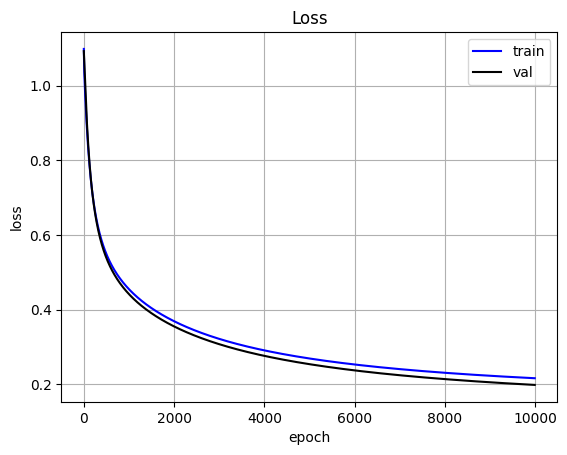

In [20]:
plt.plot(history[:, 0], history[:, 1], 'b', label='train')
plt.plot(history[:, 0], history[:, 3], 'k', label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss')
plt.legend()
plt.grid()
plt.show()

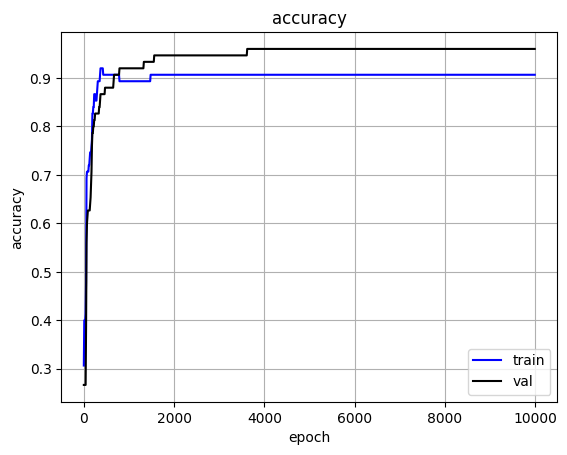

In [21]:
plt.plot(history[:, 0], history[:, 2], 'b', label='train')
plt.plot(history[:, 0], history[:, 4], 'k', label='val')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy')
plt.legend()
plt.grid()
plt.show()

In [22]:
print(labels[[0, 2, 3]])

tensor([1, 0, 2])


In [23]:
i3 = inputs[[0, 2, 3], :]
print(i3.data.numpy())

[[6.3 4.7]
 [5.  1.6]
 [6.4 5.6]]


In [24]:
softmax = torch.nn.Softmax(dim=1)
o3 = net(i3)
k3 = softmax(o3)
print(o3.data.numpy())
print(k3.data.numpy())

[[ 8.807073 14.193754 12.998573]
 [12.826237  9.799995  0.173442]
 [ 6.795414 15.09281  17.111107]]
[[3.5014111e-03 7.6497841e-01 2.3152010e-01]
 [9.5374274e-01 4.6254218e-02 3.0506492e-06]
 [2.9224984e-05 1.1729175e-01 8.8267905e-01]]


In [25]:
print(net.l1.weight.data)
print(net.l1.bias.data)

tensor([[ 3.0452, -2.5735],
        [ 1.3573,  0.8481],
        [-1.4026,  4.7253]])
tensor([ 1.7178,  1.6563, -0.3741])


In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_org, y_org, train_size=75, test_size=75, random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(75, 4) (75, 4) (75,) (75,)


In [27]:
n_input = x_train.shape[1]
n_output = len(list(set(y_train)))

print(f'n_input: {n_input} n_output: {n_output}')

n_input: 4 n_output: 3


In [28]:
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)

        self.l1.weight.data.fill_(1.0)
        self.l1.bias.data.fill_(1.0)

    def forward(self, x):
        x1 = self.l1(x)
        return x1
    
net = Net(n_input, n_output)

In [29]:
criterion = nn.CrossEntropyLoss()
lr = 0.01
optimizer = optim.SGD(net.parameters(), lr=lr)

In [30]:
inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).long()

inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).long()

In [31]:
outputs = net(inputs)
loss = criterion(outputs, labels)

In [32]:
lr = 0.01
net = Net(n_input, n_output)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
num_epochs = 10000
history = np.zeros((0, 5))

In [33]:
for epoch in range(num_epochs):
    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    predicted = torch.max(outputs, 1)[1]
    train_loss = loss.item()
    train_acc = (predicted == labels).sum() / len(labels)

    outputs_test = net(inputs_test)
    loss_test = criterion(outputs_test, labels_test)

    predicted_test = torch.max(outputs_test, 1)[1]
    val_loss = loss_test.item()
    val_acc = (predicted_test == labels_test).sum() / len(labels_test)

    if (epoch % 10 == 0):
        print(f'Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f} val_acc: {val_acc:.5f}')
        item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))

Epoch [0/10000], loss: 1.09861 acc: 0.30667 val_loss: 1.09158 val_acc: 0.26667
Epoch [10/10000], loss: 1.01848 acc: 0.40000 val_loss: 1.04171 val_acc: 0.26667
Epoch [20/10000], loss: 0.96854 acc: 0.40000 val_loss: 0.98850 val_acc: 0.26667
Epoch [30/10000], loss: 0.92459 acc: 0.65333 val_loss: 0.93996 val_acc: 0.57333
Epoch [40/10000], loss: 0.88568 acc: 0.70667 val_loss: 0.89704 val_acc: 0.62667
Epoch [50/10000], loss: 0.85120 acc: 0.70667 val_loss: 0.85918 val_acc: 0.62667
Epoch [60/10000], loss: 0.82059 acc: 0.70667 val_loss: 0.82572 val_acc: 0.62667
Epoch [70/10000], loss: 0.79335 acc: 0.72000 val_loss: 0.79607 val_acc: 0.62667
Epoch [80/10000], loss: 0.76900 acc: 0.72000 val_loss: 0.76968 val_acc: 0.65333
Epoch [90/10000], loss: 0.74717 acc: 0.72000 val_loss: 0.74610 val_acc: 0.65333
Epoch [100/10000], loss: 0.72750 acc: 0.76000 val_loss: 0.72494 val_acc: 0.69333
Epoch [110/10000], loss: 0.70970 acc: 0.77333 val_loss: 0.70585 val_acc: 0.74667
Epoch [120/10000], loss: 0.69354 acc: 0

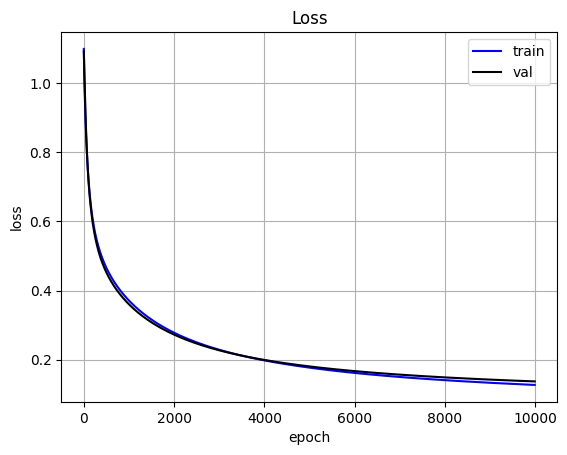

In [34]:
plt.plot(history[:, 0], history[:, 1], 'b', label='train')
plt.plot(history[:, 0], history[:, 3], 'k', label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss')
plt.legend()
plt.grid()
plt.show()

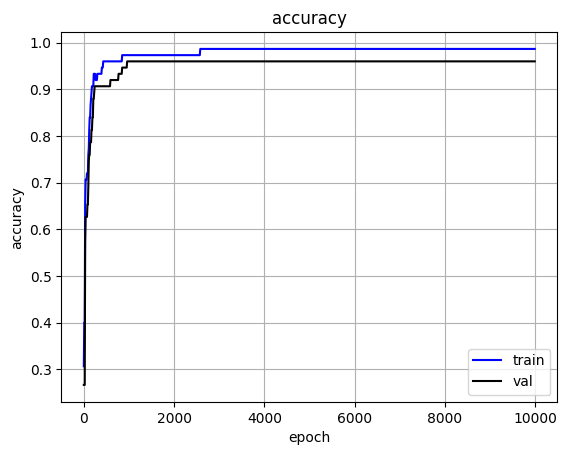

In [35]:
plt.plot(history[:, 0], history[:, 2], 'b', label='train')
plt.plot(history[:, 0], history[:, 4], 'k', label='val')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy')
plt.legend()
plt.grid()
plt.show()